In [73]:
from pathlib import Path

import cfod
from cfod.routines.waterfaller import Waterfaller

import h5py
import numpy as np

path = ['..','data','raw','cfod']

data = Path(*path)

class WaterfallData(Waterfaller):
    def _unpack(self):
        unnecessary_metadata = [
            "filename",
            "datafile",
            # "wfall",
            # "model_wfall",
        ]
        self.datafile = self.datafile["frb"]
        self.eventname = self.datafile.attrs["tns_name"].decode()
        self.wfall = self.datafile["wfall"][:]
        self.model_wfall = self.datafile["model_wfall"][:]
        self.plot_time = self.datafile["plot_time"][:]
        self.plot_freq = self.datafile["plot_freq"][:]
        self.ts = self.datafile["ts"][:]
        self.model_ts = self.datafile["model_ts"][:]
        self.spec = self.datafile["spec"][:]
        self.model_spec = self.datafile["model_spec"][:]
        self.extent = self.datafile["extent"][:]
        self.dm = self.datafile.attrs["dm"][()]
        self.scatterfit = self.datafile.attrs["scatterfit"][()]
        self.dt = np.median(np.diff(self.plot_time))
        for metadata in unnecessary_metadata:
            self.__dict__.pop(metadata, None)


frb = Waterfaller(data.joinpath('FRB20180725A_waterfall.h5'))

/home/tazaaznam/lab/sarjana/.venv/lib/python3.9/site-packages/cfod/analysis/waterfall.py:97: RuntimeWarning: Degrees of freedom <= 0 for slice.
  channel_variance = np.nanvar(wfall, axis=1)
/home/tazaaznam/lab/sarjana/.venv/lib/python3.9/site-packages/cfod/analysis/waterfall.py:206: RuntimeWarning: Mean of empty slice
  data = np.nanmean(


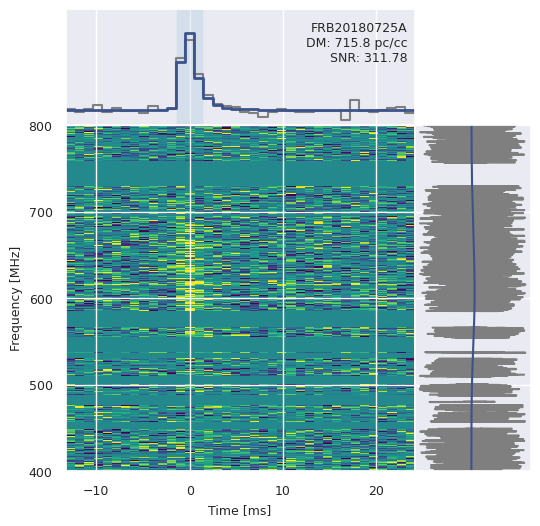

In [74]:
frb.plot()

In [75]:
frb.wfall.shape

(16384, 38)

In [76]:
frb.model_wfall.shape

(16384, 38)

In [77]:
frb.cal_wfall.shape

(16384, 192)

In [54]:
shape[0]*shape[1]

622592

In [66]:
w = frb.wfall.reshape((-1,))

In [67]:
frb.wfall = w.reshape(shape)

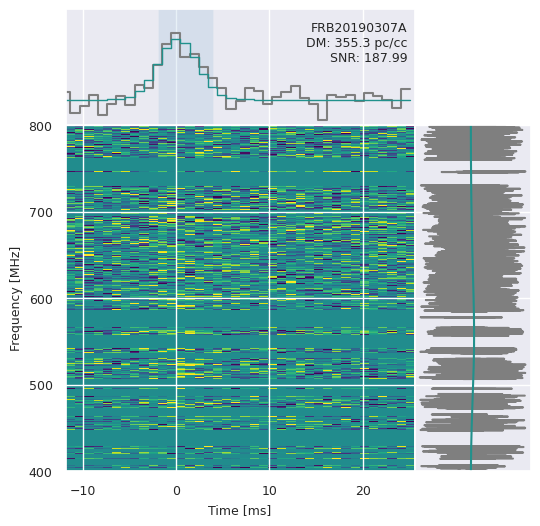

In [62]:
frb.plot()

In [85]:
import pandas as pd

pq = pd.read_parquet(data.joinpath('masalah', 'chimefrb_profile.parquet'))

In [86]:
import os

os.path.getsize(data.joinpath('masalah', 'chimefrb_profile.parquet'))

54225312